In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import sys
from importlib import reload
import cv2
import json

print('Python | Pytorch | OpenCV versions: %s | %s | %s' %(sys.version, torch.__version__, cv2.__version__))

sys.path.append('/home/blanca/mnt/projects/')
import tools
from tools.utils import *
from tools.visuals import *

if __name__ == "__main__":
    print("lol")

Python | Pytorch | OpenCV versions: 3.7.0 (default, Jun 28 2018, 13:15:42) 
[GCC 7.2.0] | 0.4.1 | 3.4.3
lol


In [2]:
import os, sys
import xmltodict
from pathlib import Path
import numpy as np
from skimage import io
import operator
from functools import reduce


def xy_xy2ulxy_wh(x):  # Convert bounding box format from [x1, y1, x2, y2] to [x, y, w, h]
    y = np.zeros(len(x))
    y[0] = x[0]
    y[1] = x[1]
    y[2] = x[2] - x[0]
    y[3] = x[3] - x[1]
    return y.tolist()

def xy_xy2bbxy_wh(x):  # Convert bounding box format from [x1, y1, x2, y2] to [x, y, w, h]
    y = np.zeros(len(x))
    y[0] = (x[0] + x[2]) / 2
    y[1] = (x[1] + x[3]) / 2
    y[2] = x[2] - x[0]
    y[3] = x[3] - x[1]
    return y.tolist()
     
def adjust_polygon_format(o_polygon):
    polygon_list = []
    co_k_x = [i for i in list(o_polygon.keys()) if i[0] == 'x']
    co_k_x = sorted(co_k_x, key=lambda x: int(x[1:]))
    for i in co_k_x:
        ix = i[1:]
        xk, yk = i, 'y' + ix
        polygon_list.append([float(o_polygon[xk]), float(o_polygon[yk])])
        
    polygon_list = reduce(operator.add, polygon_list)
    
    return polygon_list

#### COCO annot. example

In [89]:
# coco data

path = '/home/blanca/mnt/projects/detector/data/annotations'
# ctype = 'captions_train2017.json'
ctype = 'instances_val2017.json'

file = path + '/' + ctype
with open(file) as f:
    cdata = json.load(f)

# # jdata overview
# for i in jdata.keys(): print(i)

# for i in jdata.keys():
#     print(jdata['categories'])
    
print(json.dumps(jdata, indent=2))

of = 'coco_data_sample.txt'
with open(of, 'w') as f:
    json.dump(cdata, f, indent=1)

In [112]:
# 'info':
{'description': 'COCO 2017 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2017,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'}

{'description': 'COCO 2017 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2017,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [113]:
# 'image':
{"license": 3,"file_name": "000000512403.jpg","coco_url": "http://images.cocodataset.org/val2017/000000512403.jpg","height": 640,"width": 529,"date_captured": "2013-11-24 05:12:53","flickr_url": "http://farm1.staticflickr.com/143/350452845_fa743a9623_z.jpg","id": 512403}

{'license': 3,
 'file_name': '000000512403.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000512403.jpg',
 'height': 640,
 'width': 529,
 'date_captured': '2013-11-24 05:12:53',
 'flickr_url': 'http://farm1.staticflickr.com/143/350452845_fa743a9623_z.jpg',
 'id': 512403}

In [114]:
# 'annotation':
{"segmentation": [[510.66,423.01,511.72,420.03,510.45,416.0,510.34,413.02,510.77,410.26,510.77,407.5,510.34,405.16,511.51,402.83,511.41,400.49,510.24,398.16,509.39,397.31,504.61,399.22,502.17,399.64,500.89,401.66,500.47,402.08,499.09,401.87,495.79,401.98,490.59,401.77,488.79,401.77,485.39,398.58,483.9,397.31,481.56,396.35,478.48,395.93,476.68,396.03,475.4,396.77,473.92,398.79,473.28,399.96,473.49,401.87,474.56,403.47,473.07,405.59,473.39,407.71,476.68,409.41,479.23,409.73,481.56,410.69,480.4,411.85,481.35,414.93,479.86,418.65,477.32,420.03,476.04,422.58,479.02,422.58,480.29,423.01,483.79,419.93,486.66,416.21,490.06,415.57,492.18,416.85,491.65,420.24,492.82,422.9,493.56,424.39,496.43,424.6,498.02,423.01,498.13,421.31,497.07,420.03,497.07,415.15,496.33,414.51,501.1,411.96,502.06,411.32,503.02,415.04,503.33,418.12,501.1,420.24,498.98,421.63,500.47,424.39,505.03,423.32,506.2,421.31,507.69,419.5,506.31,423.32,510.03,423.01,510.45,423.01]],"area": 702.1057499999998,"iscrowd": 0,"image_id": 289343,"bbox": [473.07,395.93,38.65,28.67],"category_id": 18,"id": 1768}

{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

## convert fumehood 

In [4]:
def create_mcnn_dataset(ann_files, cat_file):

    with open(str(cat_file), 'r') as f:
        cat_data = [i.strip() for i in f.readlines()]

    cat_dic = {i:cat_data[i] for i in range(len(cat_data))}

    ### CATEGORIES ###

    categories = [{
        "id" : i, #int, 
        "name" : j, #str, 
        "supercategory" : j, #str,
    } for i, j in cat_dic.items()]

    ### DATASET ###

    info = {
        "year" : '2018', 
        "version" : '1', 
        "description" : 'fumehood', 
        "contributor" : 'v7', 
        "url" : 'none', 
        "date_created" : '2018/09/20',
    }

    dataset = {

        "info" : info, 
        "images" : [],       # image
        "annotations" : [],  # annotation
        "licenses" : [],     # license
        "categories": categories
    }

    count_i = 0
    count_o = 0
    for file in ann_files:
        with open(str(file)) as fd:
            doc = xmltodict.parse(fd.read())

            count_i += 1
            # creating an image: 
            data = doc['annotation']
            # image
            folder = data['folder']
            filename = data['filename']
            url = folder + '/' + filename
            
            im_name = str(file).split('/')[-1].split('.')[0] + '.png'    # filename.split('.')[0]
            width = int(data['size']['width'])
            height = int(data['size']['height'])
            objects = data['object']

            image_dic = {
                "id" : count_i, #int, 
                "width" : width, #int, 
                "height" : height, #int, 
                "file_name" : im_name, #str, 
                "license" : 0, #int, 
                "flickr_url" : 'no-flickr_url', #str, 
                "coco_url" : url, #str, 
                "date_captured" : "2018-20-01 00:00:00", #datetime,
            }

            license = {
                "id" : count_i, #int, 
                "name" : im_name, #str, 
                "url" : 'url', #str,
            }

            dataset['images'].append(image_dic)
            dataset['licenses'].append(image_dic)

            # parsing objects annotations
            if isinstance(objects, dict): objects = [objects]

            for i in objects:
                count_o += 1

                o_cat_name = i['name']
                o_cat_ix = cat_data.index(o_cat_name)
                o_polygon = i['polygon']
                o_polygon = [adjust_polygon_format(o_polygon)]
                o_bbox = [i['bndbox']['xmin'], i['bndbox']['ymin'], i['bndbox']['xmax'], i['bndbox']['ymax']]
                o_bbox = xy_xy2ulxy_wh([int(i) for i in o_bbox])
                o_dv_angle = i['angle']
                
                annotation = {
                    "id" : count_o, #int, 
                    "image_id" : count_i, #int, 
                    "category_id" : o_cat_ix, #int, 
                    "segmentation" : o_polygon, # polygon format or list 
                    "area" : 33., #float, 
                    "bbox" : o_bbox, #[x, y, width, height], 
                    "iscrowd" : 0, # 0 or 1,
                }

                dataset['annotations'].append(annotation)

    return dataset

#### whole set

In [5]:
xml_annotations_path = Path('/home/blanca/mnt/data/fh+/Annotations')
path = Path(xml_annotations_path)
ann_files = np.array(list(path.glob("*")))
cat_file = path.parent / Path('fumehood.names') # categories names file path

In [6]:
total_size = len(ann_files)
dataset = create_mcnn_dataset(ann_files, cat_file)
print(len(dataset['images']))

2436


#### train-val sets

In [7]:
xml_annotations_path = Path('/home/blanca/mnt/data/fh+/Annotations')
path = Path(xml_annotations_path)
ann_files = np.array(list(path.glob("*")))
cat_file = path.parent / Path('fumehood.names') # categories names file path

In [8]:
total_size = len(ann_files)
train_set_size = int(total_size * 0.9)
val_set_size = int(total_size * 0.1)
val_set_ix = np.random.randint(0, total_size, val_set_size)
val_ann_files = np.array(ann_files)[val_set_ix]
train_ann_files = np.setdiff1d(ann_files, val_ann_files)

train_dataset = create_mcnn_dataset(train_ann_files, cat_file)
val_dataset = create_mcnn_dataset(val_ann_files, cat_file)

print(len(train_dataset['images']), len(val_dataset['images']))

1497 165


#### saving as .json

In [9]:
out_file_train = '/home/blanca/mnt/data/fh+/annotations/annotations_train.json'
out_file_val = '/home/blanca/mnt/data/fh+/annotations/annotations_val.json'

with open(out_file_train, 'w') as f:
    json.dump(train_dataset, f, indent=1)

with open(out_file_val, 'w') as f:
    json.dump(val_dataset, f, indent=1)

In [7]:
out_file = '/home/blanca/mnt/data/fh+/annotations/annotations.json'

with open(out_file, 'w') as f:
    json.dump(dataset, f, indent=1)

In [51]:
# detections_path = '/tmp/detectron-output/test/fumehood_train/generalized_rcnn'
# detection_file = 'detections.pkl'

# import pickle
# data = pickle.load(open(detection_file,'rb'), encoding='latin1') #, errors='ignore'
# for i, j in data.items():
#     print(i)
# data['all_boxes']

## Annotatios for the two first sessions

In [76]:
xml_annotations_path = Path('/home/blanca/mnt/data/fh/Annotations')
path = Path(xml_annotations_path)
ann_files = list(path.glob("*")) 
cat_file = path.parent / Path('fumehood.names') # categories names file path
print(len(ann_files))

ann_files_s0 = sorted([i for i in ann_files if i.name.split('.')[0][-1] == '0'])
ann_files_s1 = sorted([i for i in ann_files if i.name.split('.')[0][-1] == '1'])

print(len(ann_files_s0), len(ann_files_s1))

dataset_s0 = create_mcnn_dataset(ann_files_s0, cat_file)
dataset_s1 = create_mcnn_dataset(ann_files_s1, cat_file)

out_file_s0 = '/home/blanca/mnt/data/fh/annotations/annotations_s0.json'
out_file_s1 = '/home/blanca/mnt/data/fh/annotations/annotations_s1.json'

with open(out_file_s0, 'w') as f:
    json.dump(dataset_s0, f, indent=1)
    
with open(out_file_s1, 'w') as f:
    json.dump(dataset_s1, f, indent=1)

390
183 207


# Test on Recordings

In [48]:
p = '/home/blanca/recordings/'
folders = ['Images0', 'Images1', 'Images2']
[os.makedirs(p + f, exist_ok=True) for f in folders]

[None, None, None]

In [54]:
for f in folders:
    out_p = p + f
    file = p + f[-1]+'.mp4'
    vidcap = cv2.VideoCapture(file)
    success, image = vidcap.read()
    count = 0
    while success:
        count += 1
        width = 10
        im_name = str(count).zfill(width) + '.jpg'
        cv2.imwrite(out_p + '/' + im_name, image)     # save frame as JPEG file      
        success, image = vidcap.read()
        print('Wrote a new frame as: ', out_p + '/' + im_name)
# 449, 449, 450

Wrote a new frame as:  /home/blanca/recordings/Images0/0000000001.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000002.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000003.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000004.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000005.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000006.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000007.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000008.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000009.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000010.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000011.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000012.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000013.jpg
Wrote a new frame as:  /home/blanca/recordings/Images0/0000000014.jpg
Wrote a new frame as

#### cheching model output size (?)

(1080, 1920, 3)


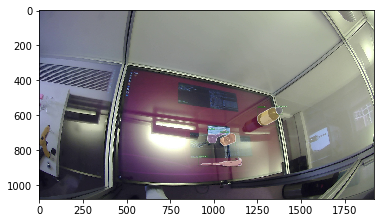

In [14]:
path = '/home/blanca/mnt/tmp/0000000449.jpg'
im = cv2.imread(path)
print(im.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(im[:,:,::-1])

## Create Video

In [25]:
import cv2
import os
import numpy as np

suffix = '2'

input_dir = '/home/blanca/mnt/tmp/r%s/' %suffix
output_dir = '/home/blanca/mnt/Detectron_VisOutput/'
output_name = output_dir + 'recordings-%s-rcnn-b256_10e3.avi' %suffix

images = sorted([img for img in np.sort(os.listdir(input_dir)) if img.endswith(".jpg")])

frame = cv2.imread(os.path.join(input_dir, images[0]))
height, width, layers = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter(output_name, fourcc, 15.0, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(input_dir, image)))

cv2.destroyAllWindows()
video.release()

In [13]:
import cv2
import os
import numpy as np

input_dir = '/home/blanca/mnt/projects/detector/mask-rcnn.pytorch/output/R-101/tmp/camara_output/'
output_dir = '/home/blanca/mnt/projects/detector/mask-rcnn.pytorch/output/R-101/tmp/'
output_name = output_dir + 'camara_output.avi'

images = sorted([img for img in np.sort(os.listdir(input_dir)) if img.endswith(".jpg")])

frame = cv2.imread(os.path.join(input_dir, images[0]))
height, width, layers = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter(output_name, fourcc, 10.0, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(input_dir, image)))

cv2.destroyAllWindows()
video.release()

#### colormap

In [55]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np


def colormap(rgb=False):
    color_list = np.array(
        [
            0.000, 0.447, 0.741,
            0.850, 0.325, 0.098,
            0.929, 0.694, 0.125,
            0.494, 0.184, 0.556,
            0.466, 0.674, 0.188,
            0.301, 0.745, 0.933,
            0.635, 0.078, 0.184,
            0.300, 0.300, 0.300,
            0.600, 0.600, 0.600,
            1.000, 0.000, 0.000,
            1.000, 0.500, 0.000,
            0.749, 0.749, 0.000,
            0.000, 1.000, 0.000,
            0.000, 0.000, 1.000,
            0.667, 0.000, 1.000,
            0.333, 0.333, 0.000,
            0.333, 0.667, 0.000,
            0.333, 1.000, 0.000,
            0.667, 0.333, 0.000,
            0.667, 0.667, 0.000,
            0.667, 1.000, 0.000,
            1.000, 0.333, 0.000,
            1.000, 0.667, 0.000,
            1.000, 1.000, 0.000,
            0.000, 0.333, 0.500,
            0.000, 0.667, 0.500,
            0.000, 1.000, 0.500,
            0.333, 0.000, 0.500,
            0.333, 0.333, 0.500,
            0.333, 0.667, 0.500,
            0.333, 1.000, 0.500,
            0.667, 0.000, 0.500,
            0.667, 0.333, 0.500,
            0.667, 0.667, 0.500,
            0.667, 1.000, 0.500,
            1.000, 0.000, 0.500,
            1.000, 0.333, 0.500,
            1.000, 0.667, 0.500,
            1.000, 1.000, 0.500,
            0.000, 0.333, 1.000,
            0.000, 0.667, 1.000,
            0.000, 1.000, 1.000,
            0.333, 0.000, 1.000,
            0.333, 0.333, 1.000,
            0.333, 0.667, 1.000,
            0.333, 1.000, 1.000,
            0.667, 0.000, 1.000,
            0.667, 0.333, 1.000,
            0.667, 0.667, 1.000,
            0.667, 1.000, 1.000,
            1.000, 0.000, 1.000,
            1.000, 0.333, 1.000,
            1.000, 0.667, 1.000,
            0.167, 0.000, 0.000,
            0.333, 0.000, 0.000,
            0.500, 0.000, 0.000,
            0.667, 0.000, 0.000,
            0.833, 0.000, 0.000,
            1.000, 0.000, 0.000,
            0.000, 0.167, 0.000,
            0.000, 0.333, 0.000,
            0.000, 0.500, 0.000,
            0.000, 0.667, 0.000,
            0.000, 0.833, 0.000,
            0.000, 1.000, 0.000,
            0.000, 0.000, 0.167,
            0.000, 0.000, 0.333,
            0.000, 0.000, 0.500,
            0.000, 0.000, 0.667,
            0.000, 0.000, 0.833,
            0.000, 0.000, 1.000,
            0.000, 0.000, 0.000,
            0.143, 0.143, 0.143,
            0.286, 0.286, 0.286,
            0.429, 0.429, 0.429,
            0.571, 0.571, 0.571,
            0.714, 0.714, 0.714,
            0.857, 0.857, 0.857,
            1.000, 1.000, 1.000
        ]
    ).astype(np.float32)
    color_list = color_list.reshape((-1, 3)) * 255
    if not rgb:
        color_list = color_list[:, ::-1]
    return color_list

In [56]:
color_list = colormap(rgb=True) / 255


In [58]:
mask_color_id = 0
for i in range (20):
    color_mask = color_list[mask_color_id % len(color_list), 0:3]
    mask_color_id += 1
    print(color_mask)

[0.    0.447 0.741]
[0.85  0.325 0.098]
[0.929 0.694 0.125]
[0.494 0.184 0.556]
[0.466 0.674 0.188]
[0.301 0.745 0.933]
[0.635 0.078 0.184]
[0.3 0.3 0.3]
[0.6 0.6 0.6]
[1. 0. 0.]
[1.  0.5 0. ]
[0.749 0.749 0.   ]
[0. 1. 0.]
[0. 0. 1.]
[0.667 0.    1.   ]
[0.333 0.333 0.   ]
[0.333 0.667 0.   ]
[0.333 1.    0.   ]
[0.667 0.333 0.   ]
[0.667 0.667 0.   ]


In [60]:
classes = cat_dic
classes

{0: 'beaker',
 1: 'bottle',
 2: 'flask',
 3: 'bare_hand',
 4: 'glove_hand',
 5: 'pipette',
 6: 'pipette_label',
 7: 'bottle_cap'}

In [62]:
color_dict = {
    '__background__': [0.   , 0.447, 0.741],
    'beaker':         [0.85 , 0.325, 0.098],
    'bottle':         [0.929, 0.694, 0.125],
    'flask':          [0.494, 0.184, 0.556],
    'bare_hand':      [0.466, 0.674, 0.188],
    'glove_hand':     [0.301, 0.745, 0.933],
    'pipette':        [0.635, 0.078, 0.184],
    'pipette_label':  [0.3  , 0.3  , 0.3  ],
    'bottle_cap':     [0.6  , 0.6  , 0.6  ],
}

In [65]:
mask_color_id = 0
for i in range (9):
    color_mask = color_list[mask_color_id % len(color_list), 0:3]
    mask_color_id += 1
    color_mask_fixed = color_dict[i]
    print(color_mask, color_mask_fixed)

[0.    0.447 0.741] [0.0, 0.447, 0.741]
[0.85  0.325 0.098] [0.85, 0.325, 0.098]
[0.929 0.694 0.125] [0.929, 0.694, 0.125]
[0.494 0.184 0.556] [0.494, 0.184, 0.556]
[0.466 0.674 0.188] [0.466, 0.674, 0.188]
[0.301 0.745 0.933] [0.301, 0.745, 0.933]
[0.635 0.078 0.184] [0.635, 0.078, 0.184]
[0.3 0.3 0.3] [0.3, 0.3, 0.3]
[0.6 0.6 0.6] [0.6, 0.6, 0.6]


In [11]:
# pytorch model 
import cv2
import os
import numpy as np

suffix = '2'

input_dir = '/home/blanca/mnt/projects/detector/mask-rcnn.pytorch/output/R-101/tmp/r%s' %suffix 
output_dir = '/home/blanca/mnt/projects/detector/R-101-mask-output/tmp/'
output_name = output_dir + 'torch_r%s.avi' %suffix

images = sorted([img for img in np.sort(os.listdir(input_dir)) if img.endswith(".png")])

frame = cv2.imread(os.path.join(input_dir, images[0]))
height, width, layers = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter(output_name, fourcc, 10.0, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(input_dir, image)))

cv2.destroyAllWindows()
video.release()

#### Download images from annotations path

In [36]:
# move to utils
import xmltodict
from skimage import io
from pathlib import Path

def download_images_and_parse_labels(annotations_path, output_path, save_images=True): 
    files, nO_files = 0, 0
    path = Path(annotations_path)
    ann_files = list(path.glob("*")) 
    cat_file = Path('/home/blanca/mnt/data/fh+') / Path('fumehood.names') # categories names file path
    
    with open(str(cat_file), 'r') as f:
        cat_file = [i.strip() for i in f.readlines()]
    
    dataset = {} # store all dataset labels in a dic (for now) - format {m_name: {image: np, label: list}
    for file in ann_files:
        with open(str(file)) as fd:
            doc = xmltodict.parse(fd.read())

        data = doc['annotation']
        folder = data['folder']
        try : objects = data['object']
        except: 
            nO_files += 1
            print('No object labeled in file %s' %file)
            continue
        filename = data['filename']
#         session_type = folder.split('/')[-2]
#         session = folder.split('/')[-1]
        im_name = str(file).split('/')[-1].split('.')[0] + '.png'
        
        # retrieve the image
        url = folder + '/' + filename
        im = io.imread(url)
        if save_images: io.imsave(output_path + im_name, im)
        
        # retrieve and parse the label (each 'label' - multiple annotations: one image multiple labels)
        label = []
        if isinstance(objects, dict): objects = [objects]
        for i in objects:
            cat_name = i['name']
            polygon = i['polygon']
            bbox = (i['bndbox']['xmin'], i['bndbox']['ymin'], i['bndbox']['xmax'], i['bndbox']['ymax'])
            cat = [cat_file.index(cat_name)]
            lab = np.array(np.concatenate([cat, bbox]), dtype='float32')
            label.append(lab)
        
        files += 1
        if im_name in dataset: print(dataset[im_name]['file'], file)
        dataset[im_name] = {'image': im, 'label': label, 'file': file}
    # save the labels in txt files and read from them?
    return dataset, files, nO_files, len(ann_files)

input_path = '/home/blanca/mnt/data/session_14/'
output_path = '/home/blanca/mnt/data/images_/'
dataset, files, nO_files, _ = download_images_and_parse_labels(input_path, output_path)
nO_files, _

(0, 781)

In [ ]:
def download_images_and_create_video(annotations_path, output_path=None, save_video=False, save_images=False): 
    """
    Downloads the images from .xml, orders thema and reconstructs the video.
    """
    
    files, nO_files = 0, 0
    path = Path(annotations_path)
    ann_files = list(path.glob("*")) 
    cat_file = Path('/home/blanca/mnt/data/fh+') / Path('fumehood.names') # categories names file path
    
    dataset = {} 
    # store all dataset labels in a dic (for now) - 
    # format: {session_type: session_number: {image_number: url (str)}
    for file in ann_files:
        with open(str(file)) as fd:
            doc = xmltodict.parse(fd.read())

        data = doc['annotation']
        folder = data['folder']
        try : objects = data['object']
        except: 
            nO_files += 1
            print('No object labeled in file %s' %file)
            continue
        filename = data['filename']
        session_type = folder.split('/')[-2]
        session_number = folder.split('/')[-1]
        # image_file_name = str(file).split('/')[-1].split('.')[0] + '.png'
        image_number = filename
        
        url = folder + '/' + filename

        key = session_type + '_' + session_number
        
        if key in dataset: dataset[key][image_number] = url
        else: 
            dataset[key] = {}
            dataset[key][image_number] = url
        
    if save_video:
        # retrieve per session:
        for _, key in enumerate(dataset.keys()):
            im_names = sorted([i for i in dataset[key].keys()])
            # definde codec and create VideoWriter object
            url = dataset[key][im_names[0]]
            frame = io.imread(url)
            height, width, layers = frame.shape
            fourcc = cv2.VideoWriter_fourcc(*'XVID')
            session_dir = output_dir + key
            video = cv2.VideoWriter(session_dir + '.avi', fourcc, 10.0, (width, height))

            if save_images: 
                if not os.path.exists(session_dir): os.makedirs(session_dir)
                print(session_dir)
            for i in im_names:
                # url = dataset[key][i]
                im = io.imread(dataset[key][i])[:,:,::-1]
                video.write(im)
                if save_images: io.imsave(session_dir + '/' + im_name, im) 
            # [video.write(io.imread(dataset[key][i])) for i in images]
            # cv2.destroyAllWindows()
            video.release()
            # if _ == 0: break
        
    files += 1

    return dataset, files, len(ann_files)

input_dir = '/home/blanca/mnt/data/fh+/Annotations/'
# output_dir = '/home/blanca/mnt/data/test_video/'

# if not os.path.exists(output_dir): os.makedirs(output_dir, exist_ok=True)

sessions_dataset, files, n_anns = download_images_and_create_video(input_dir)
print(len(sessions_dataset))